In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
from scipy import interpolate

In [22]:
T = 300
Cm = (2*1.380649e-23*T/(27*1.66e-27) )**0.5 # (2kT/m)**0.5 27 for the Al
n = 1

In [16]:
def max_velocity_u(Cm, random1, random2, n):
    return Cm*np.sqrt(-np.log(random1))*(np.cos(2*np.pi*random2))**n

def max_velocity_w(Cm,  random1, random2, n):
    return Cm*np.sqrt(-np.log(random1))*(np.sin(2*np.pi*random2))**n

def max_velocity_v(Cm,  random3):
    return -Cm*np.sqrt(-np.log(random3))

In [17]:
def velMat(Cm, n):
    N = int(1e7)

    Random1 = np.random.rand(N)
    Random2 = np.random.rand(N)
    Random3 = np.random.rand(N)
    velosity_matrix = np.array([max_velocity_u(Cm, Random1, Random2, n), \
                                max_velocity_w(Cm, Random1, Random2, n), \
                                max_velocity_v(Cm, Random3)]).T
    return velosity_matrix

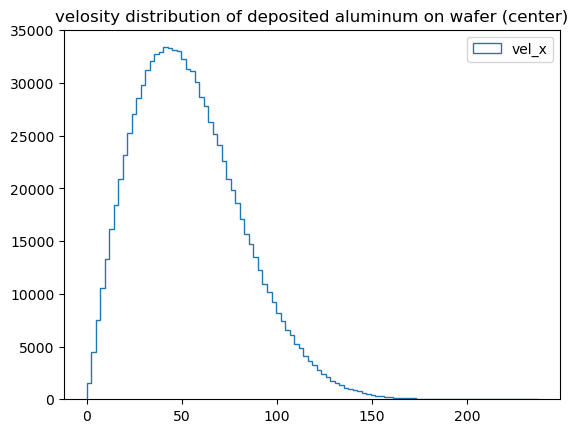

In [18]:
N = int(1e6)
Random1 = np.random.rand(N)
maxwell = Cm*np.sqrt(-np.log(Random1))/10

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(maxwell, bins=100,histtype='step', stacked=True, fill=False, label='vel_x')

# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

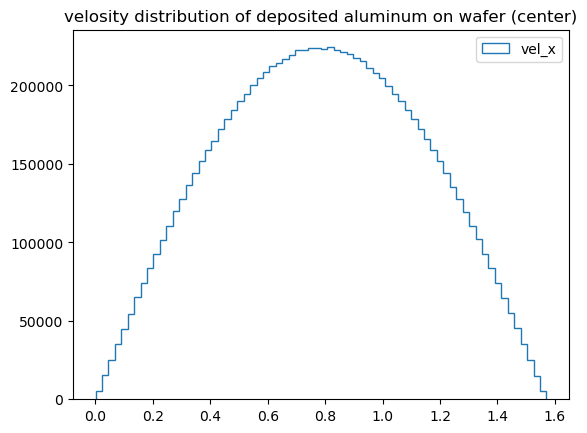

In [20]:
y_erosion_np = np.arctan((np.linalg.norm(velosity_matrix[:, :2], axis=1))/-velosity_matrix[:, 2])

fig, ax = plt.subplots()

ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(y_erosion_np, bins=70,histtype='step', stacked=True, fill=False, label='vel_x')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

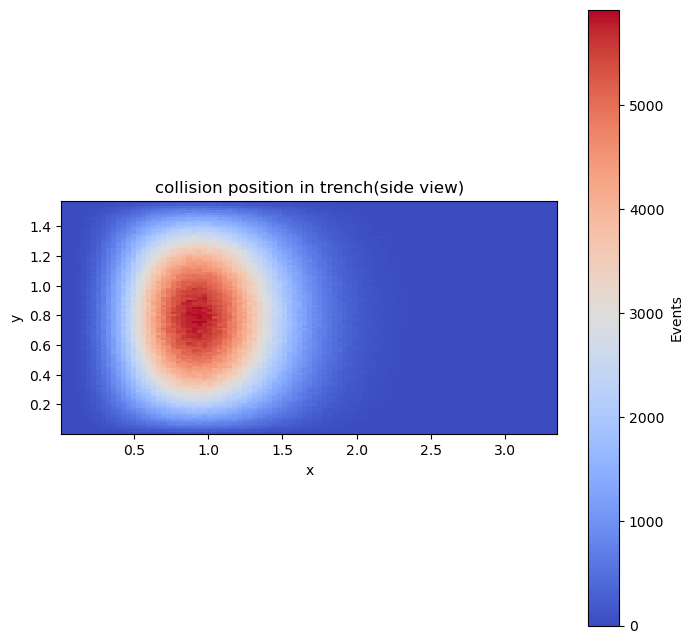

In [24]:
velosity_matrix = velMat(10, 1)

energy = np.linalg.norm(velosity_matrix, axis=1)

x_erosion_np = energy/np.average(energy)
y_erosion_np = np.arctan((np.linalg.norm(velosity_matrix[:, :2], axis=1))/-velosity_matrix[:, 2])

xbins = np.linspace(x_erosion_np.min(),x_erosion_np.max(),100)
ybins = np.linspace(y_erosion_np.min(),y_erosion_np.max(),100)

# ybins = np.linspace(1.815, 2.415, 200)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]] ,cmap='coolwarm')
ax.set_title('collision position in trench(side view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [25]:
velosity_matrix[:,0] = np.divide(velosity_matrix[:,0], energy)
velosity_matrix[:,1] = np.divide(velosity_matrix[:,1], energy)
velosity_matrix[:,2] = np.divide(velosity_matrix[:,2], energy)

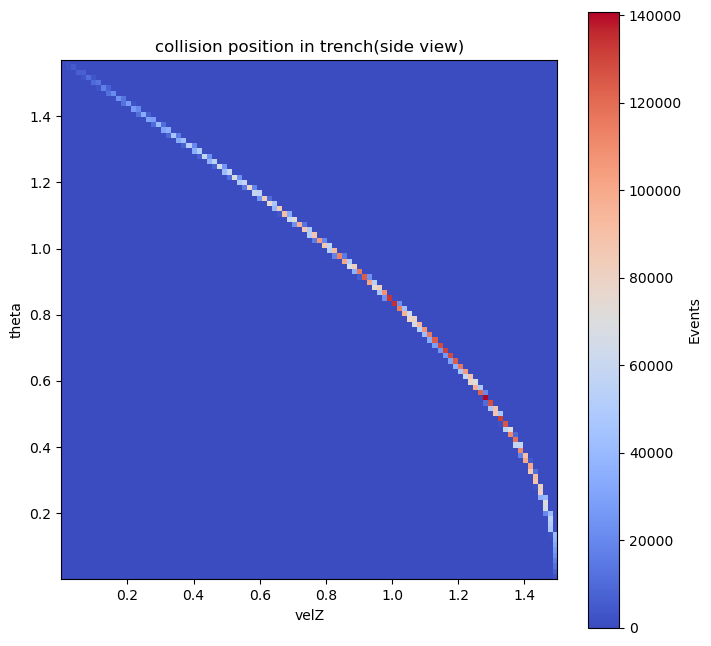

In [26]:
x_erosion_np = velosity_matrix[:, 2]/np.average(velosity_matrix[:, 2])
y_erosion_np = np.arctan((np.linalg.norm(velosity_matrix[:, :2], axis=1))/-velosity_matrix[:, 2])

xbins = np.linspace(x_erosion_np.min(),x_erosion_np.max(),100)
ybins = np.linspace(y_erosion_np.min(),y_erosion_np.max(),100)

# ybins = np.linspace(1.815, 2.415, 200)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]] ,cmap='coolwarm')
ax.set_title('collision position in trench(side view)')
ax.set_xlabel('velZ')
ax.set_ylabel('theta')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

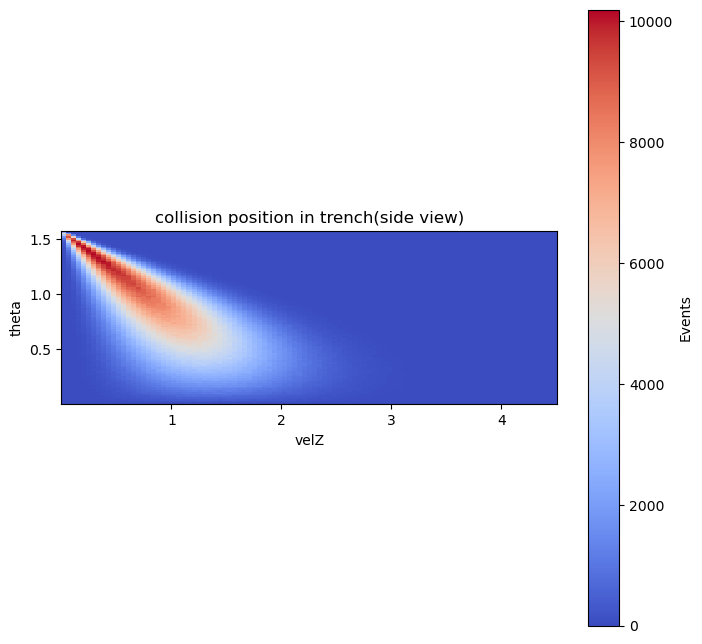

In [10]:
x_erosion_np = velosity_matrix[:, 2]/np.average(velosity_matrix[:, 2])
y_erosion_np = np.arctan((np.linalg.norm(velosity_matrix[:, :2], axis=1))/-velosity_matrix[:, 2])

xbins = np.linspace(x_erosion_np.min(),x_erosion_np.max(),100)
ybins = np.linspace(y_erosion_np.min(),y_erosion_np.max(),100)

# ybins = np.linspace(1.815, 2.415, 200)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]] ,cmap='coolwarm')
ax.set_title('collision position in trench(side view)')
ax.set_xlabel('velZ')
ax.set_ylabel('theta')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

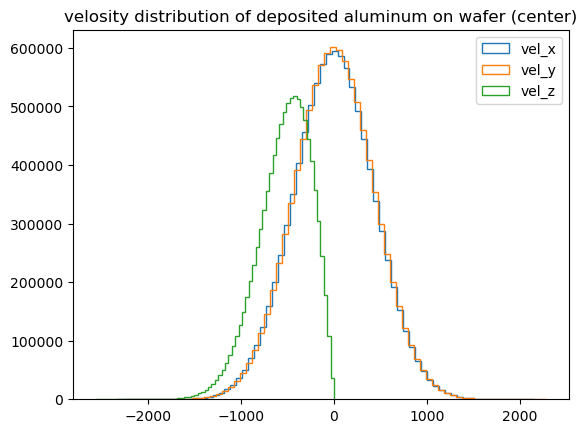

In [21]:
velosity_matrix = velMat(Cm, 1)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=70,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=70,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=70,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [24]:
T = 1200
Cm = (2*1.380649e-23*T/(27*1.66e-27) )**0.5 # (2kT/m)**0.5 27 for the Al
n = 1

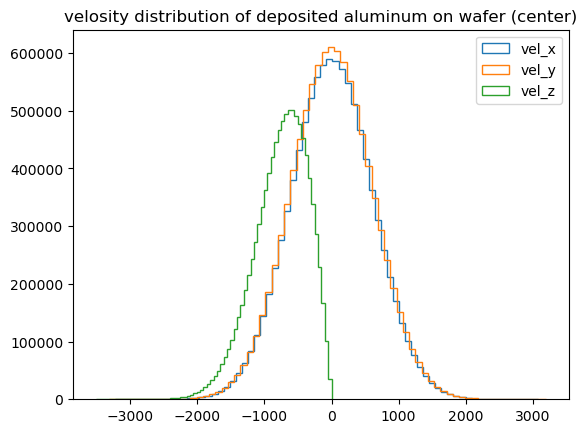

In [25]:
velosity_matrix = velMat(Cm, 1)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=70,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=70,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=70,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [14]:
def rfunc_2(x, n): #Release factor function
    # print("-------rfunc------")
    # print(x)
    y = np.cos(x) ** n 
    return y

theta_bins_size = 100
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]

theta_hist_y = rfunc_2(theta_hist_x, 1)
theta_hist_y *= 1e5
theta_sample = np.array([])

for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1], int(theta_hist_y[i]))))

np.random.shuffle(theta_sample)
theta_sample = theta_sample[:N]
phi = np.random.rand(theta_sample.shape[0])*2*np.pi
vel_x = np.cos(phi)*np.sin(theta_sample)*1e3
vel_y = np.sin(phi)*np.sin(theta_sample)*1e3
vel_z = np.cos(theta_sample)*1e3
velosity_matrix = np.array([vel_x, vel_y, vel_z]).T

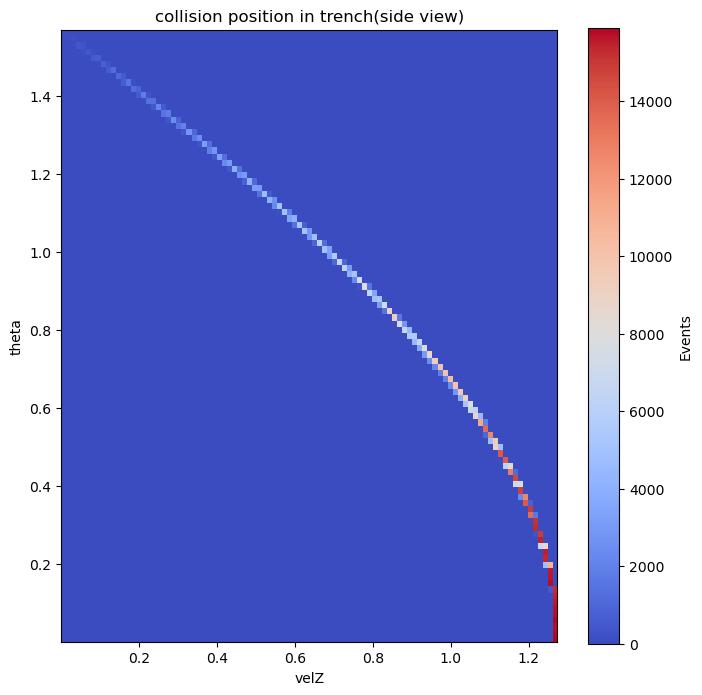

In [16]:
x_erosion_np = velosity_matrix[:, 2]/np.average(velosity_matrix[:, 2])
y_erosion_np = np.arctan((np.linalg.norm(velosity_matrix[:, :2], axis=1))/velosity_matrix[:, 2])

xbins = np.linspace(x_erosion_np.min(),x_erosion_np.max(),100)
ybins = np.linspace(y_erosion_np.min(),y_erosion_np.max(),100)

# ybins = np.linspace(1.815, 2.415, 200)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]] ,cmap='coolwarm')
ax.set_title('collision position in trench(side view)')
ax.set_xlabel('velZ')
ax.set_ylabel('theta')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

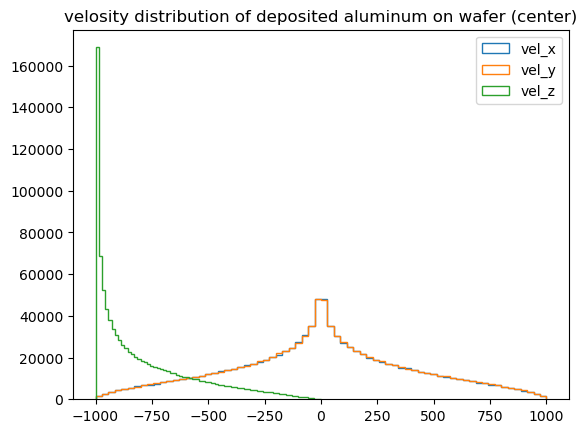

In [12]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=70,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=70,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=70,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [2]:
result2 = np.load('./transport_TS60_result_posvel.npy')

depo_pv = result2
a = np.array(depo_pv)
print(a.shape)

center_indices = np.logical_or(a[:,0] < -0.04, a[:,0] > 0.04)
center_indices |= np.logical_or(a[:,1] < -0.04, a[:,1] > 0.04)
center_indices |= np.array(a[:,2] > 0.02)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(5811284, 6)
(223470, 6)


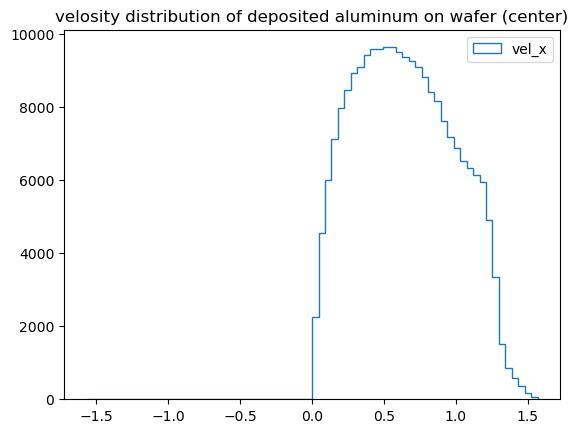

In [7]:
y_erosion_np = np.arctan((np.linalg.norm(center_depo[:, 3:5], axis=1))/-center_depo[:, 5])

fig, ax = plt.subplots()

ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(y_erosion_np, bins=70,histtype='step', stacked=True, fill=False, label='vel_x')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(223470, 3)


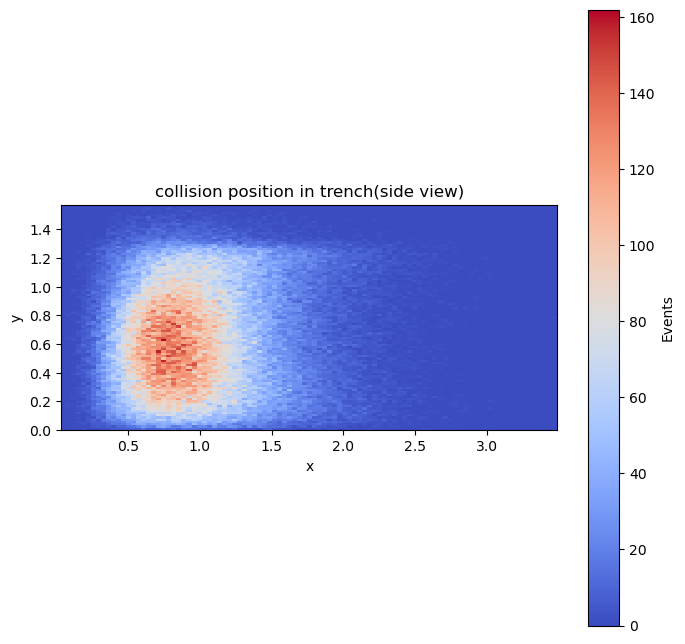

In [10]:
velosity_matrix = center_depo[:,3:]

print(velosity_matrix.shape)
energy = np.linalg.norm(velosity_matrix, axis=1)

x_erosion_np = energy/np.average(energy)
y_erosion_np = np.arctan((np.linalg.norm(velosity_matrix[:, :2], axis=1))/-velosity_matrix[:, 2])

xbins = np.linspace(x_erosion_np.min(),x_erosion_np.max(),100)
ybins = np.linspace(0,y_erosion_np.max(),100)

# ybins = np.linspace(1.815, 2.415, 200)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]] ,cmap='coolwarm')
ax.set_title('collision position in trench(side view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

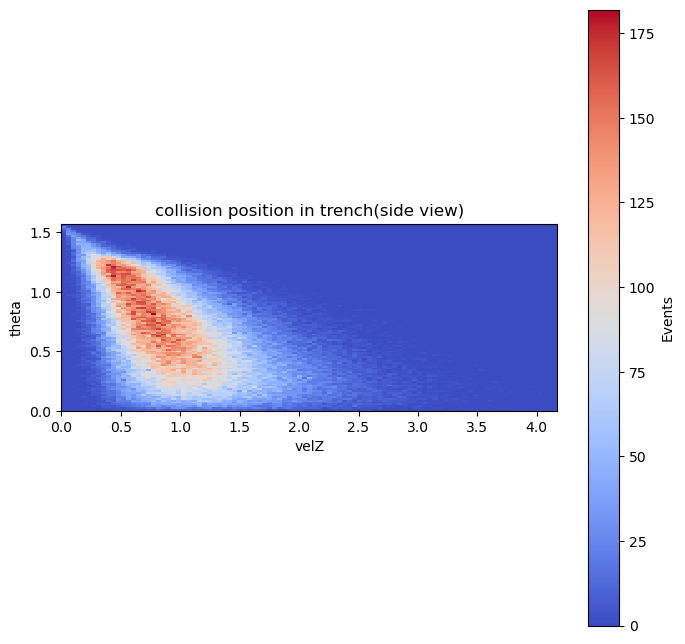

In [13]:
x_erosion_np = velosity_matrix[:, 2]/np.average(velosity_matrix[:, 2])
y_erosion_np = np.arctan((np.linalg.norm(velosity_matrix[:, :2], axis=1))/-velosity_matrix[:, 2])

xbins = np.linspace(0,x_erosion_np.max(),100)
ybins = np.linspace(0,y_erosion_np.max(),100)

# ybins = np.linspace(1.815, 2.415, 200)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]] ,cmap='coolwarm')
ax.set_title('collision position in trench(side view)')
ax.set_xlabel('velZ')
ax.set_ylabel('theta')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

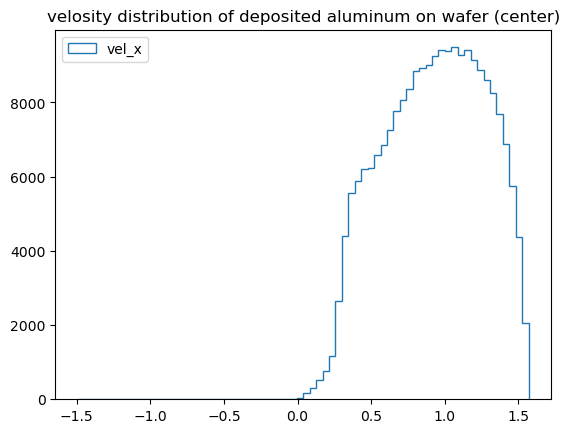

In [45]:
y_erosion_np = np.arctan(-velosity_matrix[:, 2]/(np.linalg.norm(velosity_matrix[:, :2], axis=1)))

fig, ax = plt.subplots()

ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(y_erosion_np, bins=70,histtype='step', stacked=True, fill=False, label='vel_x')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(223470, 3)


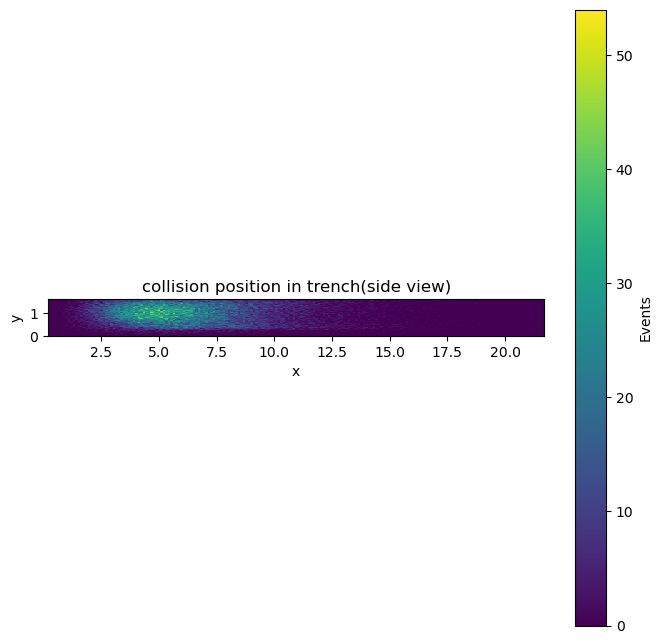

In [44]:
velosity_matrix = center_depo[:,3:]

print(velosity_matrix.shape)
energy = np.linalg.norm(velosity_matrix, axis=1)

x_erosion_np = energy/1000
y_erosion_np = np.arctan(-velosity_matrix[:, 2]/(np.linalg.norm(velosity_matrix[:, :2], axis=1)))

xbins = np.linspace(x_erosion_np.min(),x_erosion_np.max(),200)
ybins = np.linspace(0,y_erosion_np.max(),200)

# ybins = np.linspace(1.815, 2.415, 200)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('collision position in trench(side view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

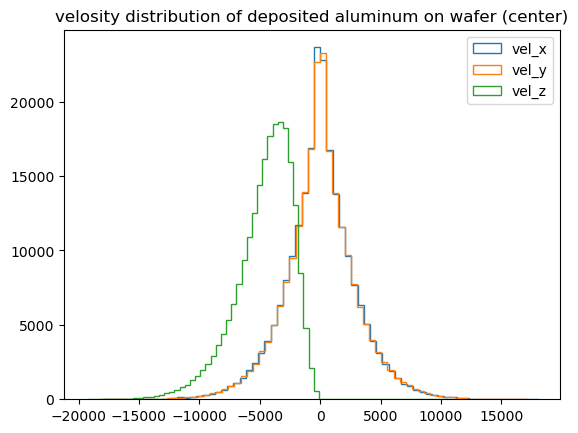

In [12]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=70,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=70,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=70,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(5052442, 6)
(460255, 6)


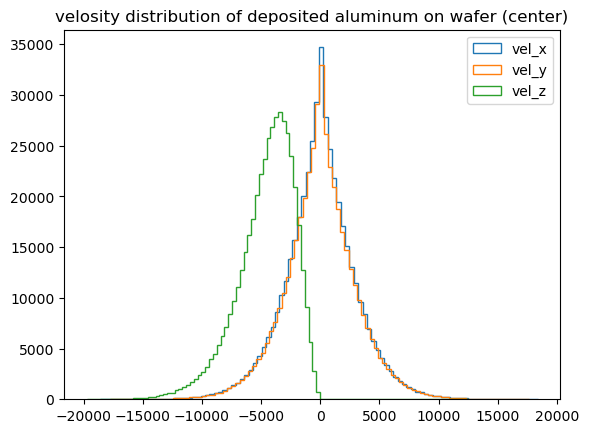

In [14]:
result2 = np.load('./transport_TS60_result_posvel_03Pa.npy')

depo_pv = result2
a = np.array(depo_pv)
print(a.shape)

center_indices = np.logical_or(a[:,0] < -0.06, a[:,0] > 0.06)
center_indices |= np.logical_or(a[:,1] < -0.06, a[:,1] > 0.06)
center_indices |= np.array(a[:,2] > 0.02)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(2722016, 6)
(92494, 6)


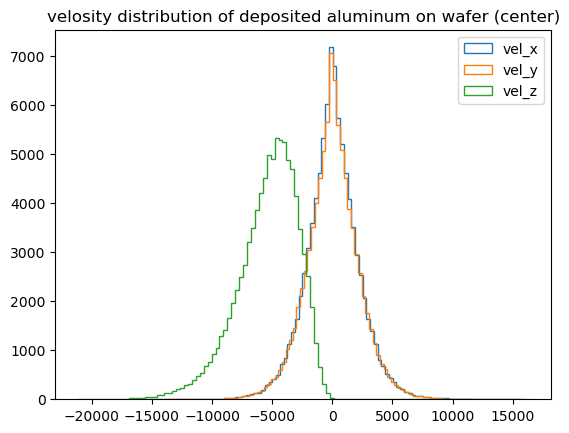

In [15]:
result2 = np.load('./transport_TS300_result_posvel.npy')

depo_pv = result2
a = np.array(depo_pv)
print(a.shape)

center_indices = np.logical_or(a[:,0] < -0.04, a[:,0] > 0.04)
center_indices |= np.logical_or(a[:,1] < -0.04, a[:,1] > 0.04)
center_indices |= np.array(a[:,2] > 0.02)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

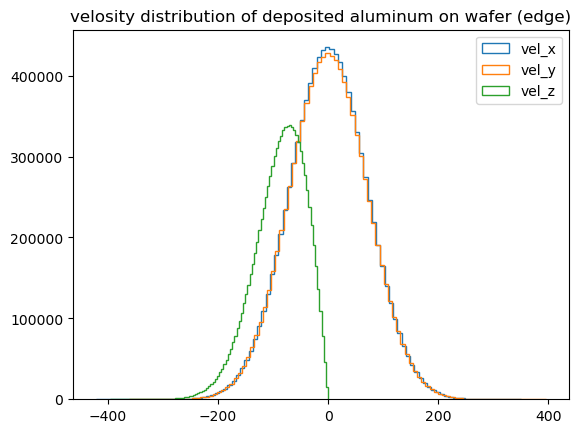

In [25]:
velosity_matrix = velMat(100, 1)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

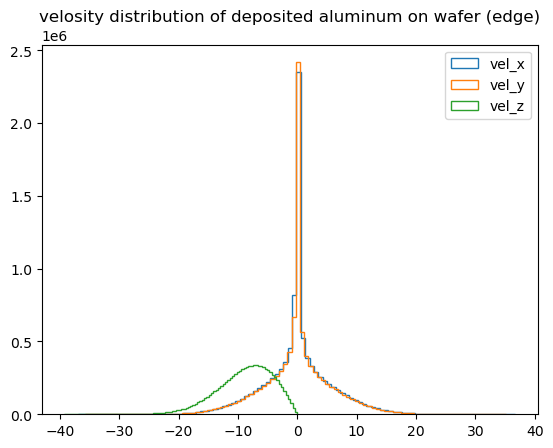

In [27]:
velosity_matrix = velMat(10, 3)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

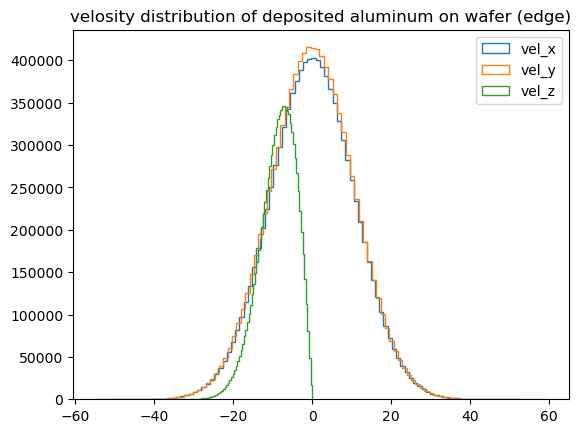

In [34]:
velosity_matrix = velMat(10, 1)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0]*1.5, bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1]*1.5, bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [2]:
def rfunc_2(x, n): #Release factor function
    # print("-------rfunc------")
    # print(x)
    y = np.cos(x) ** n 
    return y

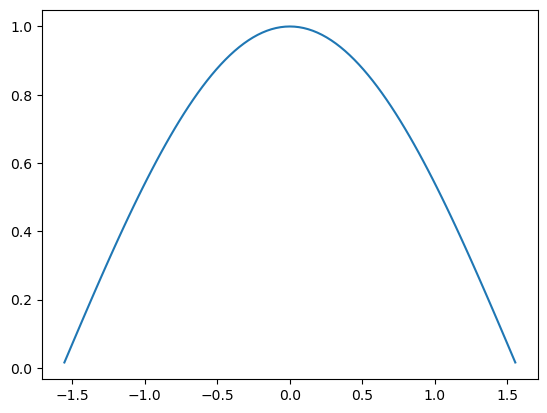

In [3]:
theta_bins_size = 100
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]

theta_hist_y = rfunc_2(theta_hist_x, 1)

fig, ax = plt.subplots(1, 1)

ax.plot(theta_hist_x, theta_hist_y)

(99,)
1000000.0
63028001.98032255
(63027946,)


(array([ 15713.,  46834.,  77832., 108762., 139561., 170399., 200993.,
        231120., 261242., 291327., 320899., 349762., 379503., 406993.,
        435625., 463885., 489973., 517644., 543771., 568867., 594761.,
        618506., 643328., 666357., 688619., 711329., 733006., 751756.,
        772761., 791529., 809372., 828850., 843412., 859611., 874146.,
        889190., 902066., 915474., 925413., 936721., 946144., 954699.,
        962671., 969345., 974562., 979922., 984173., 987163., 988503.,
        990062., 989609., 988366., 987346., 985403., 978656., 974490.,
        969652., 962121., 955219., 946341., 936443., 925471., 915714.,
        901108., 889969., 873825., 861082., 843934., 826824., 809255.,
        792274., 771635., 753179., 731887., 711547., 688977., 665988.,
        643298., 619328., 593793., 569045., 544454., 517213., 490626.,
        463005., 436062., 407398., 379003., 349554., 321164., 291157.,
        261029., 231353., 200908., 170163., 139767., 108820.,  77877.,
      

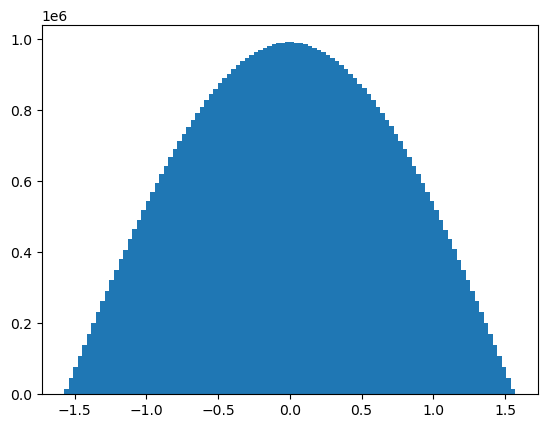

In [38]:
print(theta_hist_y.shape)
theta_hist_y *= 1e6
print(theta_hist_y.max())
print(theta_hist_y.sum())

theta_sample = np.array([])

for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1], int(theta_hist_y[i]))))

print(theta_sample.shape)
plt.hist(theta_sample, bins=100)

In [39]:
phi = np.random.rand(theta_sample.shape[0])*2*np.pi
vel_x = np.cos(phi)*np.sin(theta_sample)*10
vel_y = np.sin(phi)*np.sin(theta_sample)*10
vel_z = np.cos(theta_sample)*10
velosity_matrix_2 = np.array([vel_x, vel_y, -vel_z]).T

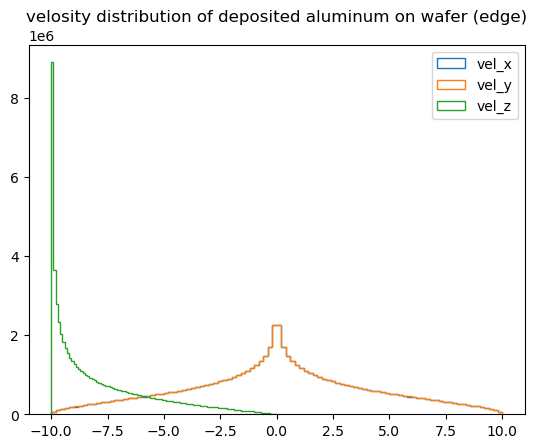

In [40]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix_2[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix_2[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix_2[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

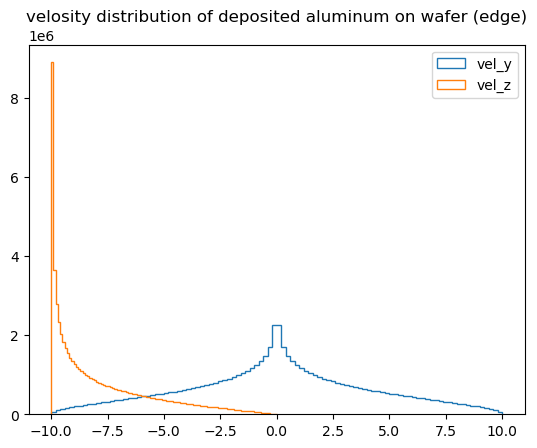

In [43]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
# ax.hist(velosity_matrix_2[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix_2[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix_2[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()